# CapStone Project - Hamoye
### By Sumit Redekar

### Problem Statement: Predicting Covid Death Rate Without Country Feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv('worldometer_coronavirus_daily_data.csv', parse_dates=['date'])

In [4]:
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     117064 non-null  datetime64[ns]
 1   country                  117064 non-null  object        
 2   cumulative_total_cases   117064 non-null  float64       
 3   daily_new_cases          110191 non-null  float64       
 4   active_cases             116532 non-null  float64       
 5   cumulative_total_deaths  110148 non-null  float64       
 6   daily_new_deaths         96221 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 6.3+ MB


In [6]:
df['country'].value_counts()

China                        556
Mali                         532
Kyrgyzstan                   532
Zimbabwe                     532
Romania                      532
                            ... 
Gabon                        532
Falkland Islands Malvinas    532
Guinea                       532
Thailand                     532
Colombia                     532
Name: country, Length: 220, dtype: int64

In [7]:
df.isnull().sum()

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases             6873
active_cases                 532
cumulative_total_deaths     6916
daily_new_deaths           20843
dtype: int64

<AxesSubplot:>

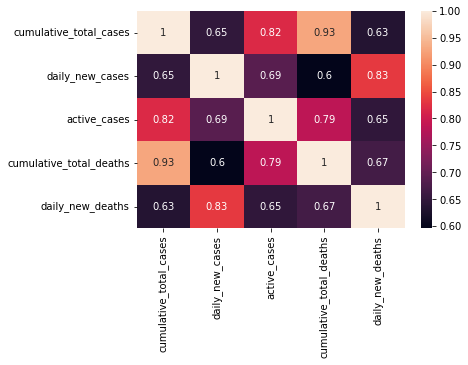

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [9]:
df['active_cases'].unique()

array([0.0000e+00, 1.0000e+00, 4.0000e+00, ..., 2.7935e+04, 2.8844e+04,
       2.9438e+04])

### Data Wrangling

 - So for now we will **extend our date feature into date, month and year**.
 - For this notebook we will drop country fetaure.
 - Then we will **fill all the missing values with median, because median is more robust to outliers compare to mean**.

In [10]:
data = df.copy()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     117064 non-null  datetime64[ns]
 1   country                  117064 non-null  object        
 2   cumulative_total_cases   117064 non-null  float64       
 3   daily_new_cases          110191 non-null  float64       
 4   active_cases             116532 non-null  float64       
 5   cumulative_total_deaths  110148 non-null  float64       
 6   daily_new_deaths         96221 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 6.3+ MB


In [12]:
data.describe()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,1.170640e+05,110191.000000,1.165320e+05,110148.000000,96221.000000
mean,3.232067e+05,1796.563767,4.285222e+04,8250.967734,43.891895
std,1.855618e+06,10553.141797,3.395986e+05,38418.415852,201.552470
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000,-31.000000
25%,3.230000e+02,0.000000,3.000000e+01,9.000000,0.000000
50%,6.603000e+03,40.000000,8.000000e+02,131.000000,1.000000
75%,8.798600e+04,544.000000,9.288250e+03,1821.000000,12.000000
max,3.568851e+07,414433.000000,9.041162e+06,629064.000000,5015.000000


#### Extending date feature

In [13]:
data['day'] = data.date.dt.day
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year

data.drop('date', axis=1, inplace=True)

In [14]:
data.head()

,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,day,month,year
0,Afghanistan,0.0,NaN,0.0,0.0,NaN,15,2,2020
1,Afghanistan,0.0,NaN,0.0,0.0,NaN,16,2,2020
2,Afghanistan,0.0,NaN,0.0,0.0,NaN,17,2,2020
3,Afghanistan,0.0,NaN,0.0,0.0,NaN,18,2,2020
4,Afghanistan,0.0,NaN,0.0,0.0,NaN,19,2,2020


#### Dropping country feature

In [15]:
data.drop('country', axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cumulative_total_cases   117064 non-null  float64
 1   daily_new_cases          110191 non-null  float64
 2   active_cases             116532 non-null  float64
 3   cumulative_total_deaths  110148 non-null  float64
 4   daily_new_deaths         96221 non-null   float64
 5   day                      117064 non-null  int64  
 6   month                    117064 non-null  int64  
 7   year                     117064 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 7.1 MB


#### Filling missing values with median

In [17]:
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())

In [18]:
data.isnull().sum()

cumulative_total_cases     0
daily_new_cases            0
active_cases               0
cumulative_total_deaths    0
daily_new_deaths           0
day                        0
month                      0
year                       0
dtype: int64

In [19]:
data.head()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,day,month,year
0,0.0,40.0,0.0,0.0,1.0,15,2,2020
1,0.0,40.0,0.0,0.0,1.0,16,2,2020
2,0.0,40.0,0.0,0.0,1.0,17,2,2020
3,0.0,40.0,0.0,0.0,1.0,18,2,2020
4,0.0,40.0,0.0,0.0,1.0,19,2,2020


### Data Analysis

#### Correlation Analysis

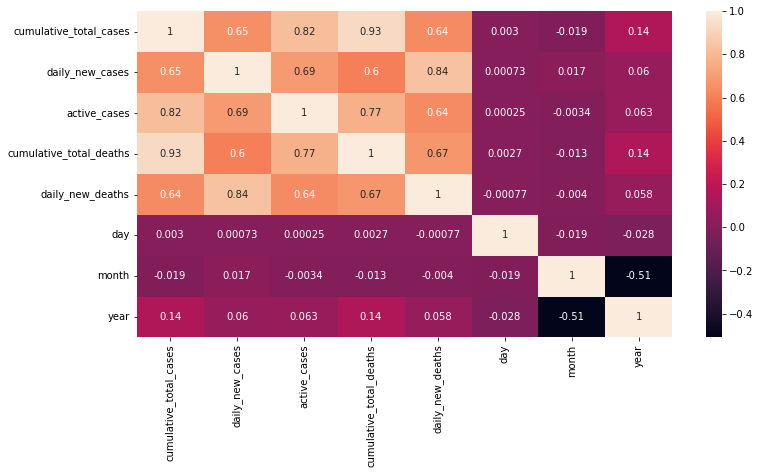

In [20]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True);

#### Active Cases, Daily deaths, Daily cases and cumulative deaths with respect to month

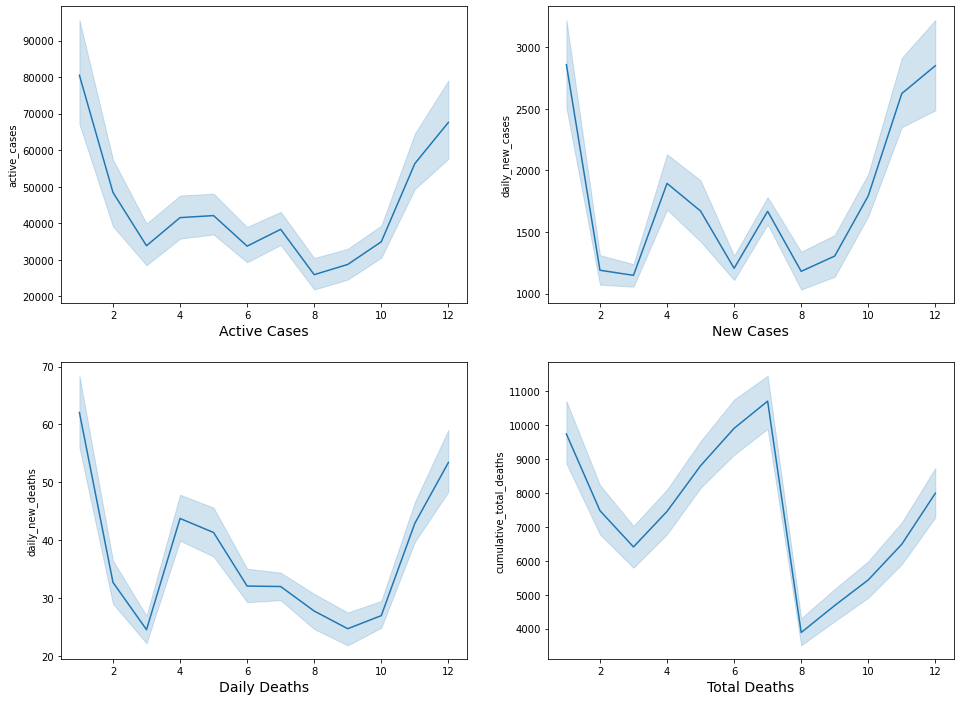

In [21]:
fig, ax = plt.subplots(nrows =2, ncols = 2, figsize = (16, 12))

sns.lineplot(data['month'], data['active_cases'], ax=ax[0,0])
ax[0,0].set_xlabel('Active Cases', fontsize = 14)

sns.lineplot(data['month'], data['daily_new_cases'], ax=ax[0,1])
ax[0,1].set_xlabel('New Cases', fontsize = 14)

sns.lineplot(data['month'], data['daily_new_deaths'], ax=ax[1,0])
ax[1,0].set_xlabel('Daily Deaths', fontsize = 14)

sns.lineplot(data['month'], data['cumulative_total_deaths'], ax=ax[1,1])
ax[1,1].set_xlabel('Total Deaths', fontsize = 14);

### Modeling

#### Splitting

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cumulative_total_cases   117064 non-null  float64
 1   daily_new_cases          117064 non-null  float64
 2   active_cases             117064 non-null  float64
 3   cumulative_total_deaths  117064 non-null  float64
 4   daily_new_deaths         117064 non-null  float64
 5   day                      117064 non-null  int64  
 6   month                    117064 non-null  int64  
 7   year                     117064 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 7.1 MB


In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('daily_new_deaths', axis=1)
y = data['daily_new_deaths']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((93651, 7), (23413, 7))

#### Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Importing models

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor

In [26]:
#metrics function

from sklearn.metrics import mean_squared_error

def RMSE(y_test, preds):
    return np.sqrt(mean_squared_error(y_test, preds))

In [26]:
models = {
    'GradientBoosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor(),
    'Extra': ExtraTreesRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'Cat': CatBoostRegressor(silent=True),
    'XGB': XGBRegressor(),
    'XGBRF': XGBRFRegressor(),
    "LGBM": LGBMRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVRLinear': SVR(kernel='linear')
}

In [27]:
#helper function for fitting and evaluating models

def fit_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        preds = model.predict(X_test)
        
        rmse = RMSE(y_test, preds)
        print(f'{name}: {rmse}')
        print()

#### Fitting baseline model

In [28]:
fit_evaluate(models, X_train_scaled, X_test_scaled, y_train, y_test)

GradientBoosting: 60.0587712780891

Bagging: 43.2857641963237

Extra: 37.40138740147156

DecisionTree: 53.318777737312544

Cat: 47.510567213552065

XGB: 42.78101656710259

XGBRF: 63.42735853039518

LGBM: 49.49768743151994

AdaBoost: 169.88682897492362

SVRLinear: 149.545533241491



In [30]:
np.random.seed(42)
cat_model = RandomForestRegressor(n_jobs=-1)
cat_model.fit(X_train_scaled, y_train)

cat_preds = cat_model.predict(X_test_scaled)
cat_rmse = RMSE(y_test,cat_preds)
cat_rmse

38.88006209602478

#### plotting this metrics

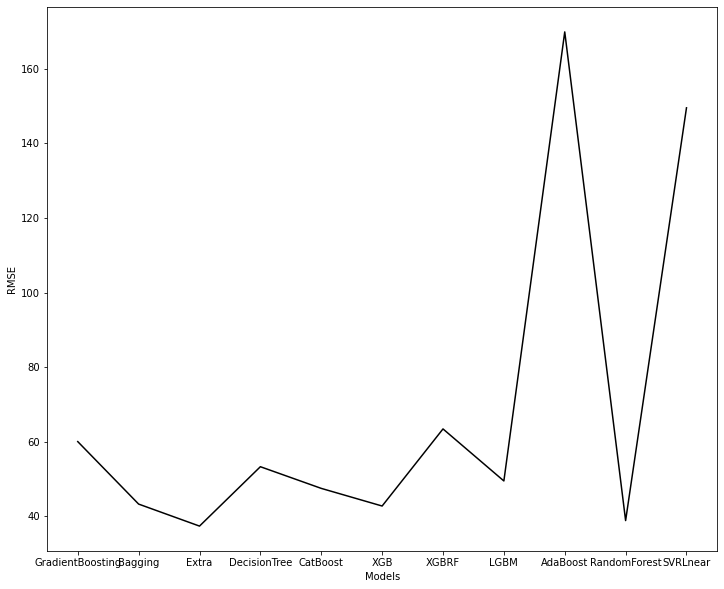

In [31]:
model = ['GradientBoosting', 'Bagging', 'Extra', 'DecisionTree', 'CatBoost', 'XGB', 'XGBRF', 'LGBM', 'AdaBoost', 'RandomForest', 'SVRLnear']
score = [60.05, 43.30, 37.40, 53.32, 47.51, 42.78, 63.45, 49.50, 169.89, 38.88, 149.54]

evaluation = pd.DataFrame()
evaluation['Models'] = model
evaluation['RMSE'] = score

fig,ax = plt.subplots(figsize=(12,10))
sns.lineplot(evaluation["Models"], evaluation["RMSE"], color='Black');


As we can two models perform well,
 - ExtraTreesRegressor - **37.40**
 - RandomForestRegressor - **38.88**
 
 
but compare to this two models **ExtraTrees perform so we will further hypertune this model**.

#### Hypertuning ExtraTreesRegressor model

Manually Hypertuning

In [32]:
n_estimators = [10,100,200,300,700]

for i in n_estimators:
    model = ExtraTreesRegressor(n_estimators=i, n_jobs=-1, random_state=42)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = RMSE(y_test, preds)
    print(f'{i}: {rmse}')
    print()

10: 38.518632187331484

100: 36.853883769011475

200: 36.84103790476489

300: 36.877570765351756

700: 36.878607362876494



Oh so when **n_estimators=200** our model perform quite well with **RMSE of 36.84**

In [33]:
max_depth = [None, 1,2,3,4,5,6]

for i in max_depth:
    model = ExtraTreesRegressor(n_estimators=200,max_depth=i,n_jobs=-1, random_state=42)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = RMSE(y_test, preds)
    print(f'{i}: {rmse}')
    print()

None: 36.84103790476489

1: 128.45485111496228

2: 103.10947320445855

3: 88.44911941898386

4: 79.86916323489511

5: 73.16506774590516

6: 66.62722290013834



Okay so we will fit our final ExtraTreesRegressor model with **n_estimators=200** and everthing else with default parameters.

In [27]:
final_model = ExtraTreesRegressor(n_estimators=200, n_jobs=-1, random_state=42)
final_model.fit(X,y)

ExtraTreesRegressor(n_estimators=200, n_jobs=-1, random_state=42)

### Feature Importance

In [35]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax.barh(df["features"][:n], df["feature_importances"][:n], color='teal')
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

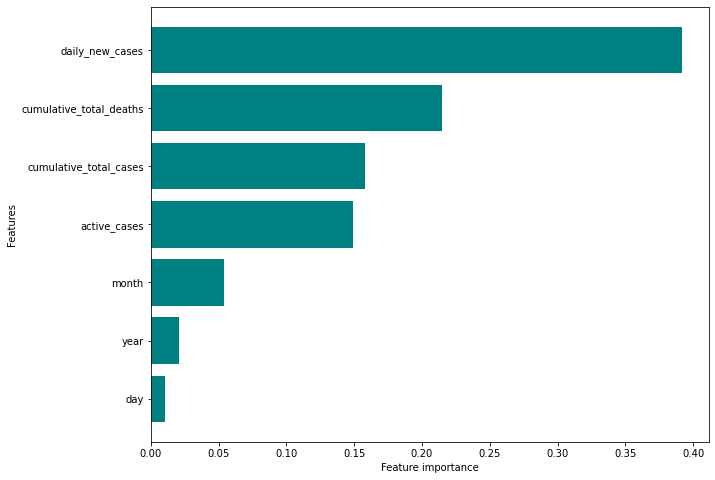

In [36]:
plot_features(X.columns, final_model.feature_importances_)

In [28]:
import joblib

In [29]:
joblib.dump(final_model, 'final_model_extra_tree_without_country.joblib', compress=True)

['final_model_extra_tree_without_country.joblib']

### Conclusion

In this notebook we have performed Data Wrangling, Data Analysis.


In data wrangling section, we extended our Date feature, filled all the missing values with median and then converted categorical features into numerical features with ordinal encoding.

then further we fitted and compare various models, then we have found that **RandomForestRegressor and ExtraTreesRegressor outperforms all other model**.

But in compare to this two model **ExtraTreesRegressor model performs best with RMSE of 37.056**

Then we hypertuned our ExtraTreesRegressor model and then the model performs well when **n_estimators=200 with RMSE of 36.6975**

At the end, we performed Feature Importance to see which feature contributes most.